In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Download MobileNet from TensorFlow Hub
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 
model = hub.load(model_url) 
print("Model loaded successfully!")

Model loaded successfully!


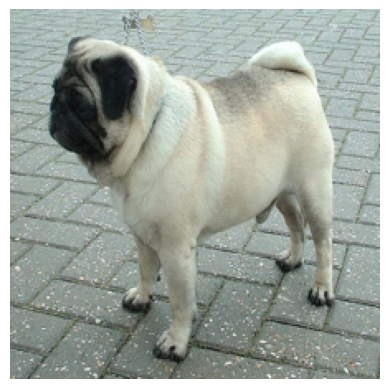

In [7]:
image_path = "https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg" 
# URL hình ảnh 
image = Image.open(tf.keras.utils.get_file("image.jpg", image_path)).resize((224, 224))
plt.imshow(image) 
plt.axis('off') 
plt.show()




In [8]:
def preprocess_image(image): 
	image = np.array(image).astype(np.float32) /255.0 # Chuẩn hóa pixel về khoảng [0, 1] 
	return image[np.newaxis, ...]  # Thêm batch dimension 

processed_image = preprocess_image(image) 
print("Image preprocessed successfully!")

Image preprocessed successfully!


In [9]:
predictions = model(processed_image) 
predicted_class = np.argmax(predictions, axis=-1) 
print("Predicted class index:", predicted_class)
labels_path = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt" 
labels = tf.keras.utils.get_file("ImageNetLabels.txt", labels_path) 
with open(labels, "r") as f: 
	labels = f.read().splitlines() 
print("Predicted label:", labels[predicted_class[0]]) 

Predicted class index: [255]
Predicted label: pug


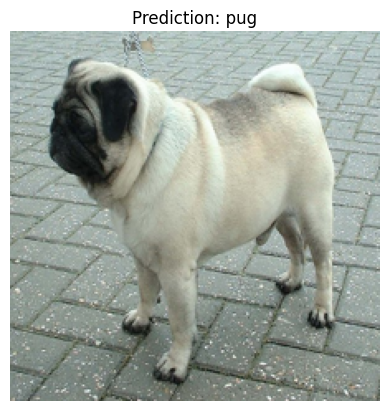

In [10]:
plt.imshow(image) 
plt.title(f"Prediction: {labels[predicted_class[0]]}") 
plt.axis('off') 
plt.show()